### Intro

Chiamo "sistema" una rete di Vogels & Abbott avente determinati parametri. Ogni sistema ha un certo numero (in questo caso 10) di realizzazioni che corrispondono alle realizzazioni delle matrici di connessione e dei valori di inizializzazione del potenziale di membrana. 

La simulazione e' stata svolta in maniera parallela per 2000 sistemi indipendenti, per un totale di 2 milioni di neuroni.

Per ciascuna realizzazione vengono estratte certe quantita', come l'attivita' media e il coefficiente di variazione dell'ISI.

La simulazione e' stata svolta in 28 minuti.

In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("./style.mplstyle")

pd.set_option('display.max_colwidth', 100)
import seaborn as sns;sns.set()

raw_df = pd.read_csv("A.csv")


raw_df.exc_conn_p *= 100
raw_df.inh_conn_p *= 100

print(f"Number of simulated systems:{len(np.unique(raw_df.sys_id))}")
print(f"Excitatory connectivities are:\n{np.unique(raw_df.exc_conn_p)}")
display(raw_df.head(20))

Number of simulated systems:20
Excitatory connectivities are:
[ 1.   10.75 20.5  30.25 40.  ]


Unnamed: 0                 sys_id                     func  pop  \
0            0  12723-140159285714928             avg_activity  exc   
1            1  12723-140159285714928          active_fraction  exc   
2            2  12723-140159285714928       rate_of_active_avg  exc   
3            3  12723-140159285714928       rate_of_active_std  exc   
4            4  12723-140159285714928             avg_activity  inh   
5            5  12723-140159285714928          active_fraction  inh   
6            6  12723-140159285714928       rate_of_active_avg  inh   
7            7  12723-140159285714928       rate_of_active_std  inh   
8            8  12723-140159285714928        gsyn_exc_avg_mean  exc   
9            9  12723-140159285714928        gsyn_inh_avg_mean  exc   
10          10  12723-140159285714928        gsyn_exc_avg_mean  inh   
11          11  12723-140159285714928        gsyn_inh_avg_mean  inh   
12          12  12723-140159285714928         v_regular_binned  exc   
13          13  12723-140159285714928              v_divergent  exc   
14          14  12723-140159285714928         v_regular_binned  inh   
15          15  12723-140159285714928              v_divergent  inh   
16          16  12723-140159285714928  phase_invariant_average  exc   
17          17  12723-140159285714928  phase_invariant_average  inh   
18          18  12723-140159470315424             avg_activity  exc   
19          19  12723-140159470315424          active_fraction  exc   

                                                                                             extraction  \
0                                                                                    1.2567112327612902   
1                                                                                                   0.0   
2                                                                                                   NaN   
3                                                                                                   NaN   
4                                                                                    1.2106537530265833   
5                                                                                                   0.0   
6                                                                                                   NaN   
7                                                                                                   NaN   
8                                                                                  6.80039269715271e-07   
9                                                                                0.00015875093040906572   
10                                                                                7.893014610035037e-07   
11                                                                               0.00022814871046251077   
12  16634.865084667465,16634.923389400527,0.0,16634.865084667465,0.0,22179.897852534035,27724.775141...   
13                                                                                                  0.0   
14  47716.21532505379,23858.197611997606,23858.107662526894,47716.21532505379,0.0,47716.39522399521,...   
15                                                                                                  0.0   
16  -60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.0...   
17  -60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.00,-60.0...   
18                                                                                    95.53637224970645   
19                                                                                               0.7625   

    timestep  time_scale_factor  duration  min_delay  neurons_per_core  \
0        0.9                 50      1000        1.8               250   
1        0.9                 50      1000        1.8               250   
2        0.9                 50      1000 

### Preprocessing

In [80]:
df= pd.DataFrame()
raw_df['id'] = raw_df.sys_id.apply(str) + "_" + raw_df['pop']
raw_df = raw_df.set_index("id")

df['id'] = np.unique(raw_df.index.values)
df['pop_type'] = df['id'].apply( lambda x: x[-3:])

df = df.set_index('id')

funcs = np.unique(raw_df.func)

time_series_funcs = []
for func in funcs:
    df[func] = raw_df[ raw_df.func == func].extraction
    try:
        df[func] = df[func].astype(float)
    except Exception as e:
        time_series_funcs.append(func)
        print(e)

for column in ['timestep', 'exc_conn_p']:
    df[column] = raw_df[raw_df.func == funcs[0]][column]
    
    
df['is_asleep'] = (df.avg_activity < 2.0).astype(int)

df.rate_of_active_avg = df.rate_of_active_avg.fillna(0)
df.rate_of_active_std = df.rate_of_active_std.fillna(0)

#### Time series
time_series = dict()

for ts_func in time_series_funcs:
    time_series[ts_func] = dict()

    for id, row in df.iterrows():
        time_series[ts_func][id] = np.array([float(val) for val in df.loc[(id, ts_func)].split(',') if val != ''])

display(time_series.keys())
df.head()

could not convert string to float: '-60.83,-59.09,-39.28,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.00,-60.83,-39.28,-61.00,-61.00,-61.00,-61.00'
could not convert string to float: '0.026897113125806126,0.027067348019007845,0.0,0.013618791456104578,0.027067348019007433,0.05396446114481439,0.026897113125806126,0.02689711312580654,0

dict_keys(['phase_invariant_average', 'v_regular_binned'])

pop_type  active_fraction  avg_activity  \
id                                                                  
12723-140159235747760_exc      exc          1.00000    158.799610   
12723-140159235747760_inh      inh          1.00000    158.885146   
12723-140159239749296_exc      exc          0.99375    155.766396   
12723-140159239749296_inh      inh          0.97500    148.831456   
12723-140159242896048_exc      exc          0.95000    142.896621   

                           gsyn_exc_avg_mean  gsyn_inh_avg_mean  isi_cv_avg  \
id                                                                            
12723-140159235747760_exc           1.646610           0.539157    0.000661   
12723-140159235747760_inh           1.633752           0.747821    0.001286   
12723-140159239749296_exc           1.211244           0.512249    0.009548   
12723-140159239749296_inh           1.201254           0.693067    0.013123   
12723-140159242896048_exc           0.748971           0.464947    0.036703   

                           isi_mean_avg  isi_tstd_avg  \
id                                                      
12723-140159235747760_exc      6.300226      0.001554   
12723-140159235747760_inh      6.300904      0.006217   
12723-140159239749296_exc      6.435840      0.044488   
12723-140159239749296_inh      6.740408      0.103558   
12723-140159242896048_exc      7.096754      0.470582   

                                                                                                       phase_invariant_average  \
id                                                                                                                               
12723-140159235747760_exc  -60.83,-59.09,-39.28,-61.00,-61.00,-61.00,-61.00,-60.83,-37.36,-61.00,-61.00,-61.00,-61.00,-61.0...   
12723-140159235747760_inh  -61.00,-60.35,-61.00,-40.09,-61.00,-61.00,-61.00,-61.00,-60.35,-39.59,-61.00,-61.00,-61.00,-61.0...   
12723-140159239749296_exc  -60.73,-60.50,-60.94,-41.19,-60.83,-60.81,-60.89,-60.89,-60.50,-41.04,-60.82,-60.85,-60.80,-60.7...   
12723-140159239749296_inh  -59.67,-60.75,-43.42,-60.30,-60.27,-60.31,-60.32,-59.19,-43.09,-60.26,-60.40,-60.39,-60.39,-60.3...   
12723-140159242896048_exc  -60.26,-59.06,-58.01,-58.61,-52.99,-60.67,-60.58,-60.52,-60.35,-58.65,-46.76,-60.37,-60.53,-60.7...   

                           rate_of_active_avg  rate_of_active_std  \
id                                                                  
12723-140159235747760_exc          158.799610            0.382243   
12723-140159235747760_inh          158.885146            0.277283   
12723-140159239749296_exc          156.726196           10.942167   
12723-140159239749296_inh          152.566667           19.444352   
12723-140159242896048_exc          150.369014           20.289991   

                           v_divergent  \
id                                       
12723-140159235747760_exc     0.857464   
12723-140159235747760_inh     0.857374   
12723-140159239749296_exc     0.840850   
12723-140159239749296_inh     0.802563   
12723-140159242896048_exc     0.772167   

                                                                                                              v_regular_binned  \
id                                                                                                                               
12723-140159235747760_exc  0.026897113125806126,0.027067348019007845,0.0,0.013618791456104578,0.027067348019007433,0.053964...   
12723-140159235747760_inh  0.05557522401483505,0.0,0.0,0.11185393187795915,0.0562787078631241,0.11185393187796092,0.0,0.0,0...   
12723-140159239749296_exc  0.021274920797072272,0.016251675608874895,0.01610393310333943,0.02644590849080551,0.033980776273...   
12723-140159239749296_inh  0.04465663788978182,0.0698973462622672,0.04853982379324111,0.05776239031395692,0.083973895162307...   
12723-140159242896048_exc  0.0004784200918036727,0.0022007324222968637,0.004305780826233054,0.01224755435017385,0.0214

### Activity

Text(0, 0.5, 'Average activity [Hz]')

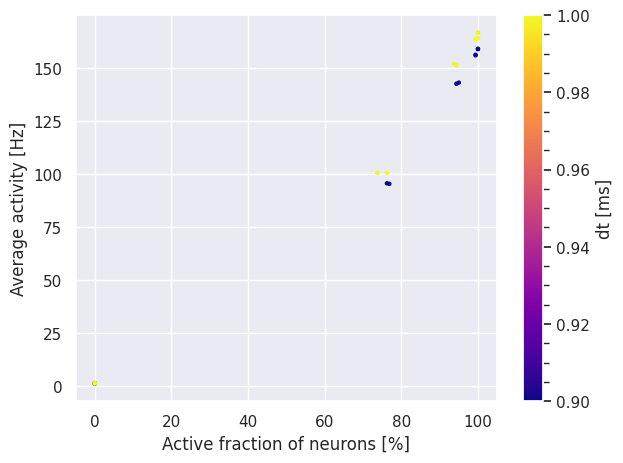

In [84]:
df = df[df.pop_type =='exc']
plt.scatter(100*df.active_fraction, df.avg_activity, c=df.timestep, cmap="plasma", s=5)
plt.colorbar(label='dt [ms]')
plt.xlabel("Active fraction of neurons [%]")
plt.ylabel("Average activity [Hz]")

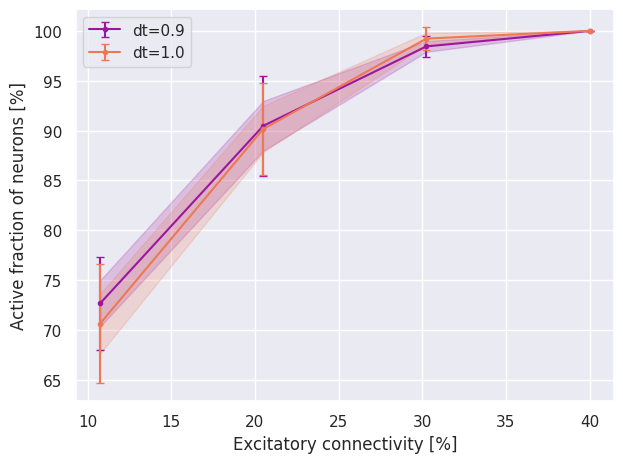

In [83]:
colors = sns.color_palette('plasma', len(df.timestep.unique()))
for dt, c in zip(df.timestep.unique(), colors):
    subdf = df[(df.timestep==dt)&(~df.is_asleep)].groupby('exc_conn_p')
    
    plt.errorbar(subdf.exc_conn_p.mean(), 100*subdf.active_fraction.mean(), 100*subdf.active_fraction.std(),
                  marker=".", ls="-",   label=f"dt={dt}", color=c)
    plt.fill_between(subdf.exc_conn_p.mean(), 
                     100*subdf.active_fraction.mean() - 0.5*100*subdf.active_fraction.std(), 
                     100*subdf.active_fraction.mean() + 0.5*100*subdf.active_fraction.std(), color=c, alpha=0.2)
plt.ylabel("Active fraction of neurons [%]")
plt.xlabel("Excitatory connectivity [%]")
plt.legend()

Text(0, 0.5, '$p_{sat}$')

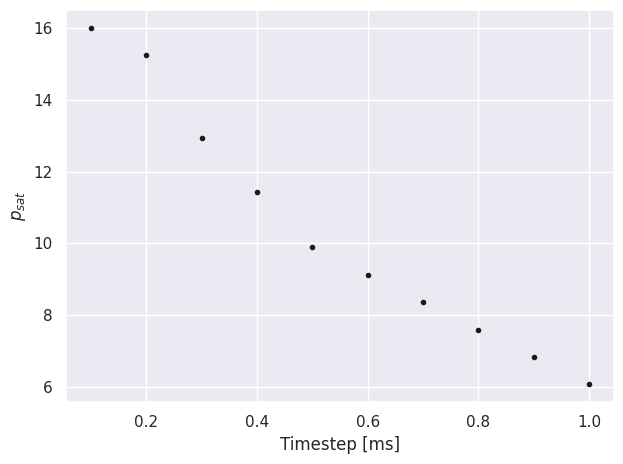

In [6]:
plt.plot(psat_dict.keys(), psat_dict.values(), ls="", marker=".", color="k")
plt.xlabel("Timestep [ms]")
plt.ylabel(r"$p_{sat}$")

Text(0, 0.5, '$A_{sat}$')

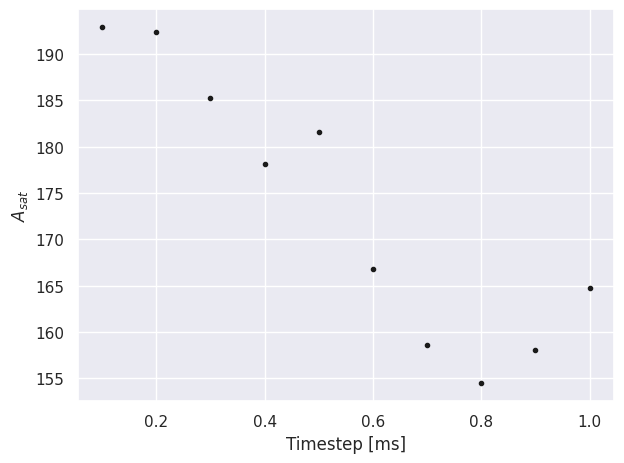

In [7]:
df['is_saturated'] = (df.active_fraction > 0.99)
asat_dict = dict()
for dt in df.timestep.unique():
    subdf = df[(df.timestep==dt)&(df.is_saturated)]
    asat_dict[dt] = np.mean(subdf.rate_of_active_avg)

plt.plot(asat_dict.keys(), asat_dict.values(), ls="", marker=".", color="k")
plt.xlabel("Timestep [ms]")
plt.ylabel(r"$A_{sat}$")

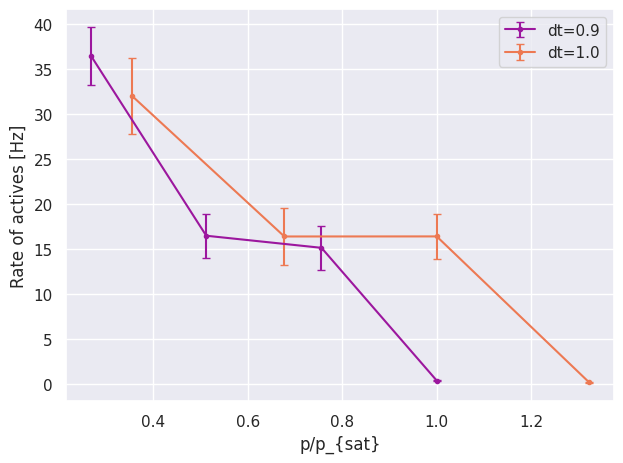

In [ ]:
colors = sns.color_palette('plasma', len(df.timestep.unique()))
for dt, c in zip(df.timestep.unique(), colors):
    subdf = df[(df.timestep == dt)&(~df.is_asleep)].groupby('exc_conn_p')
    plt.errorbar(subdf.exc_conn_p.mean()/psat_dict[dt], subdf.rate_of_active_std.mean(), 0.5*subdf.rate_of_active_std.std(), 
                 color=c, marker='.', label=f"dt={dt:.1f}")
plt.xlabel(r"p/p_{sat}")
plt.ylabel(r"Rate of actives [Hz]")
plt.legend()

### Average activity

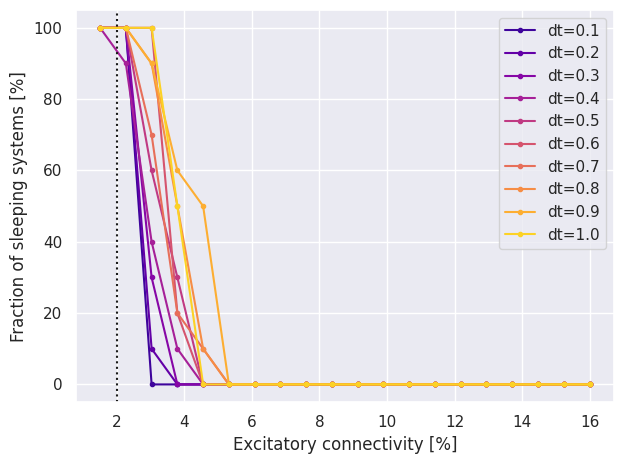

In [8]:
timesteps_to_plot = np.sort(df.timestep.unique()) #[0.1, 0.2, 0.4, 0.6, 0.8, 1.0] #

colors = sns.color_palette('plasma', len(timesteps_to_plot))
for dt ,c in zip(timesteps_to_plot, colors):
    subdf = df[df.timestep == dt]
    grouped = subdf.groupby('exc_conn_p')[['exc_conn_p', 'is_asleep']].mean()

    plt.plot(grouped.exc_conn_p, grouped.is_asleep*100,  marker=".", label=f"dt={dt}", color=c)

plt.axvline(2, color="k", ls=":")
plt.ylabel('Fraction of sleeping systems [%]')
plt.xlabel('Excitatory connectivity [%]')
plt.legend()

La figura mostra il numero di realizzazioni che non vengono attivate dallo stimolo talamico.
A parita' di connettivita' eccitatoria, i sistemi con un passo di integrazione piu' grande tendono ad essere meno attivabili, mostrando un numero piu' alto di realizzazioni inattive.

La stessa cosa in funzione del timestep. Fissata la connettivita, aumentando il timestep aumenta il numero di samples montecarlo che non vengono attivati.

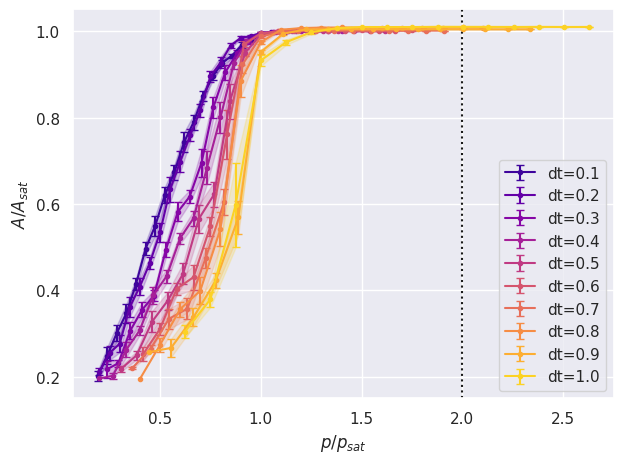

In [9]:
from sklearn.linear_model import LinearRegression
timesteps_to_plot = np.sort(df.timestep.unique())

colors = sns.color_palette('plasma', len(timesteps_to_plot))
for dt ,c in zip(timesteps_to_plot, colors):
    subdf = df[(df.timestep == dt)&(~df.is_asleep)]

    avgs = subdf.groupby('exc_conn_p')[['exc_conn_p', 'avg_activity']].mean()
    stds = subdf.groupby('exc_conn_p')[['exc_conn_p', 'avg_activity']].std()

    # model = LinearRegression()
    # model.fit(subdf.exc_conn_p.values.reshape(-1,1), subdf.extraction.values.reshape(-1,1))
    # xx = np.linspace(np.min(subdf.exc_conn_p), np.max(subdf.exc_conn_p), 2)
    # plt.plot(xx, model.predict(xx[:, None]), color=c)

    plt.errorbar(avgs.exc_conn_p/psat_dict[dt], avgs.avg_activity/asat_dict[dt], 0.5*stds.avg_activity/asat_dict[dt],  marker=".", ls="-",   label=f"dt={dt}", color=c)
    plt.fill_between(avgs.exc_conn_p/psat_dict[dt], 
                     (avgs.avg_activity - 0.5*stds.avg_activity)/asat_dict[dt], 
                     (avgs.avg_activity + 0.5*stds.avg_activity)/asat_dict[dt], color=c, alpha=0.2)

plt.axvline(2, color="k", ls=":")
plt.ylabel(r'$A/A_{sat}$')
plt.xlabel(r'$p/p_{sat}$')
plt.legend()

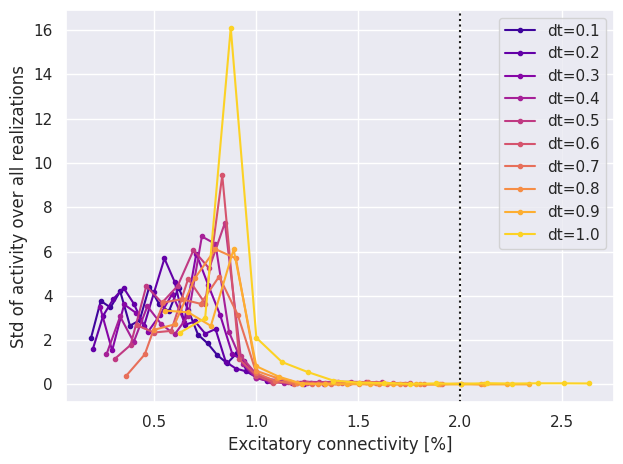

In [10]:
from sklearn.linear_model import LinearRegression
timesteps_to_plot = np.sort(df.timestep.unique())

colors = sns.color_palette('plasma', len(timesteps_to_plot))
for dt ,c in zip(timesteps_to_plot, colors):
    subdf = df[(df.timestep == dt)&(~df.is_asleep)]

    avgs = subdf.groupby('exc_conn_p')[['exc_conn_p', 'avg_activity']].mean()
    stds = subdf.groupby('exc_conn_p')[['exc_conn_p', 'avg_activity']].std()

    # model = LinearRegression()
    # model.fit(subdf.exc_conn_p.values.reshape(-1,1), subdf.extraction.values.reshape(-1,1))
    # xx = np.linspace(np.min(subdf.exc_conn_p), np.max(subdf.exc_conn_p), 2)
    # plt.plot(xx, model.predict(xx[:, None]), color=c)

    plt.plot(avgs.exc_conn_p/psat_dict[dt], 0.5*stds.avg_activity,  marker=".", ls="-",   label=f"dt={dt}", color=c)


plt.axvline(2, color="k", ls=":")
plt.ylabel('Std of activity over all realizations')
plt.xlabel('Excitatory connectivity [%]')
plt.legend()

Attivita' media delle realizzazioni attive (esclusi quindi quelle inattive, che hanno attivita' media 0). Chiaramente aumentando la connettivita' della sottorete eccitatoria aumenta l'attivita'. Per ogni valore del time step esiste un valore di connettivita' $p_{sat}$ per cui i sistemi saturano. Aumentando la precisione temporale il valore di $p_{sat}$ aumenta, quindi presumibilmente la saturazione e' un effetto dovuto all'errore di troncamento globale del sistema di ODEs. Ipotesi: Trattandosi di equazioni di primo ordine e' ragionevole pensare che l'errore di troncamento globale faccia in modo che il singolo neurone abbia all'atto pratico un tempo caratteristico $ \tau _{eff} < \tau_m $. Dal momento che il neurone si evolve piu' rapidamente spara prima, che porta a un processo a cascata. 

Il valore di saturazione non corrispone alla frequenza massima ammissibile (fortunatamente).

Stima teorica $p_{sat} (dt)$ ?

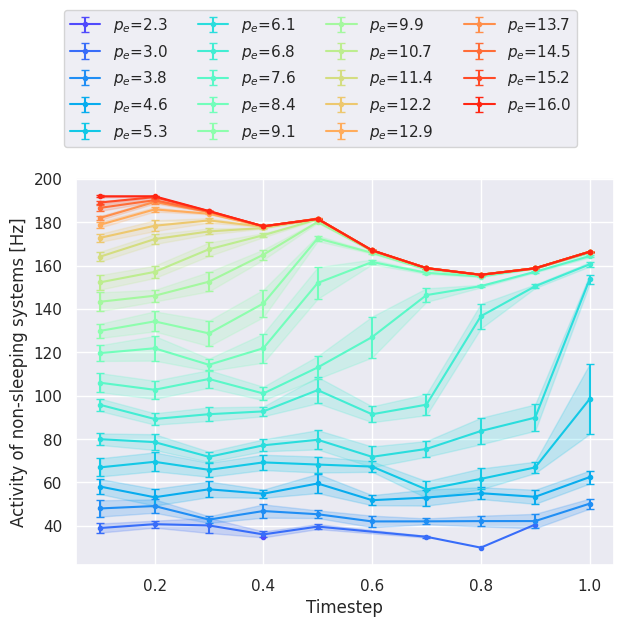

In [11]:
from sklearn.linear_model import LinearRegression
pexc_to_plot = np.sort(df.exc_conn_p.unique())

colors = sns.color_palette('rainbow', len(pexc_to_plot))
fig, ax = plt.subplots()

for pexc, c in zip(pexc_to_plot, colors):
    subdf = df[(df.exc_conn_p == pexc)&(~df.is_asleep)]

    if len(subdf) == 0:
        continue

    avgs = subdf.groupby('timestep')[['timestep', 'avg_activity']].mean()
    stds = subdf.groupby('timestep')[['timestep', 'avg_activity']].std()

    # model = LinearRegression()
    # model.fit(subdf.timestep.values.reshape(-1,1), subdf.extraction.values.reshape(-1,1))
    # xx = np.linspace(np.min(subdf.timestep), np.max(subdf.timestep), 2)
    # plt.plot(xx, model.predict(xx[:, None]), color=c)

    plt.errorbar(avgs.timestep, avgs.avg_activity, 0.5*stds.avg_activity,  marker=".", ls="-",   label=f"$p_e$={pexc:.1f}", color=c)
    plt.fill_between(avgs.timestep, 
                     avgs.avg_activity - 0.5*stds.avg_activity, 
                     avgs.avg_activity + 0.5*stds.avg_activity, color=c, alpha=0.2)

plt.ylabel('Activity of non-sleeping systems [Hz]')
plt.xlabel('Timestep')
fig.legend(loc='lower left', bbox_to_anchor=(0.1,1), ncols=4)

Stessa cosa vista al contrario: $\langle A(t) \rangle$ in funzione del timestep per ogni connettivita'. A bassa connettivita' un timestep piu' alto e' piu' coerente con il 'valore vero' di $\langle A(t) \rangle$, quello per $dt \rightarrow 0$.

### ISI CV

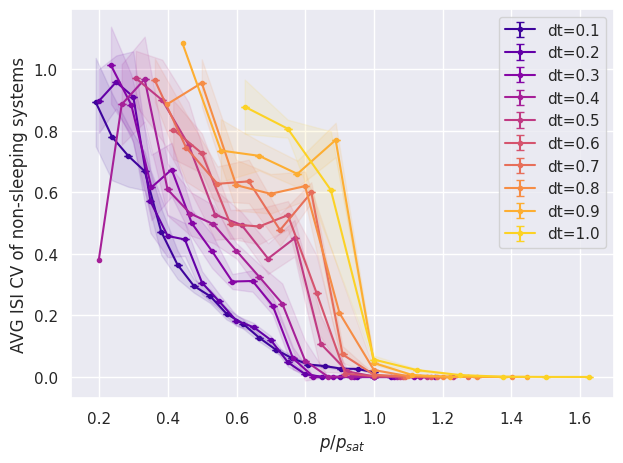

In [12]:
from sklearn.linear_model import LinearRegression
timesteps_to_plot = np.sort(df.timestep.unique())

colors = sns.color_palette('plasma', len(timesteps_to_plot))
for dt ,c in zip(timesteps_to_plot, colors):
    subdf = df[(df.timestep == dt)&(~df.is_asleep)]

    subdf = subdf.dropna()
    avgs = subdf.groupby('exc_conn_p')[['exc_conn_p', 'avg_isi_cv']].mean()
    stds = subdf.groupby('exc_conn_p')[['exc_conn_p', 'avg_isi_cv']].std()

    # model = LinearRegression()
    # model.fit(subdf.exc_conn_p.values.reshape(-1,1), subdf.extraction.values.reshape(-1,1))
    # xx = np.linspace(np.min(subdf.exc_conn_p), np.max(subdf.exc_conn_p), 2)
    # plt.plot(xx, model.predict(xx[:, None]), color=c)

    plt.errorbar(avgs.exc_conn_p/psat_dict[dt], avgs.avg_isi_cv, .0*stds.avg_isi_cv,  marker=".", ls="-",   label=f"dt={dt}", color=c)
    plt.fill_between(avgs.exc_conn_p/psat_dict[dt], 
                     avgs.avg_isi_cv - 0.5*stds.avg_isi_cv, 
                     avgs.avg_isi_cv + 0.5*stds.avg_isi_cv, color=c, alpha=0.1)

# plt.axvline(2, color="k", ls=":")
# plt.xlim(1.8, 17)
plt.ylabel('AVG ISI CV of non-sleeping systems')
plt.xlabel(r'$p/p_{sat}$')
plt.legend()

L' ISI CV decresce al decrescere della connettivita'. Reti troppo connesse mostrano un firing piu' regolare rispetto al 'valore vero'. Una cosa curiosa: prima di discendere ad un firing forzosamente regolare le reti mostrano un picco di irregolarita'. Questo picco avviene subito prima che la rete saturi ad un regime di alta attivita'. 

Ad ogni modo, e' piu corretto dire che il picco in $CV$ si verifichi per una certa connettivita' di saturazione (presumibilmente la stessa $p_{sat}$ di prima) perche' $\langle A \rangle (p_{sat})$ non e' uguale per ogni dt. 

### Activity vs CV

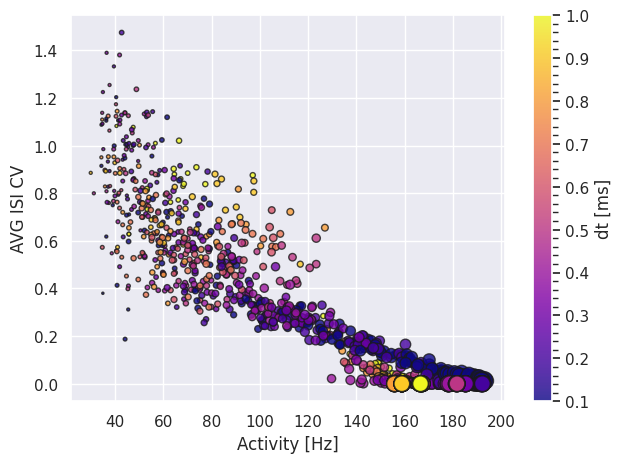

In [13]:
pexc_to_plot = np.sort(np.unique(df.exc_conn_p))
fig, ax = plt.subplots()

for pexc in pexc_to_plot:
    subdf = df[df.exc_conn_p == pexc]
    mappable = ax.scatter(subdf.avg_activity, subdf.avg_isi_cv, 
                c=subdf.timestep,
                s=0.5*(pexc)**2,
                edgecolor="k",
                alpha=0.8,
                cmap="plasma",label=f"$p_e$={pexc:.1f}%")
fig.colorbar(mappable, label="dt [ms]")
ax.set_xlabel("Activity [Hz]");
ax.set_ylabel("AVG ISI CV");

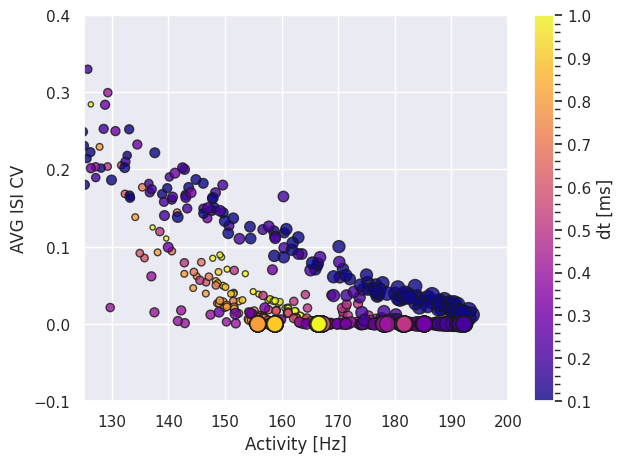

In [14]:
ax.set_xlim(125, 200)
ax.set_ylim(-0.1, 0.4)
display(fig)

## Other stats

In [15]:
df.columns

Index(['pop_type', 'active_fraction', 'avg_activity', 'avg_isi_cv',
       'isi_active_avg_mean', 'isi_active_avg_tstd', 'phase_invariant_average',
       'rate_of_active_avg', 'rate_of_active_std', 'v_divergent',
       'v_regular_quants', 'timestep', 'exc_conn_p', 'is_asleep',
       'is_saturated'],
      dtype='object')

Text(0, 0.5, '<Rate of actives>/$A_{sat}$')

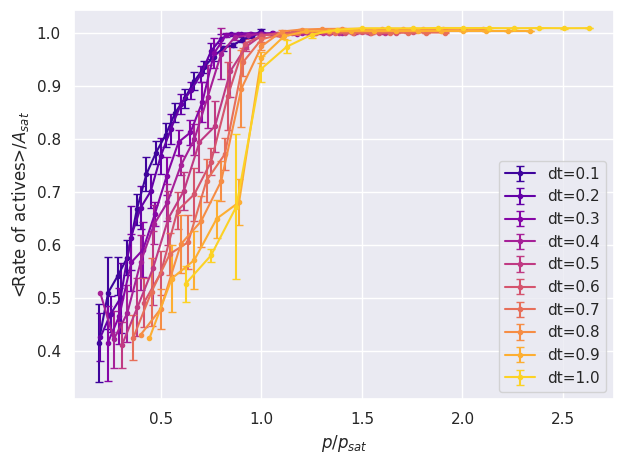

In [17]:
colors = sns.color_palette('plasma', len(df.timestep.unique()))
for dt, c in zip(df.timestep.unique(), colors):
    subdf = df[(df.timestep == dt)&(~df.is_asleep)].groupby('exc_conn_p')
    plt.errorbar(subdf.exc_conn_p.mean()/psat_dict[dt], subdf.rate_of_active_avg.mean()/asat_dict[dt], subdf.rate_of_active_avg.std()/asat_dict[dt], 
                 color=c, marker='.', label=f"dt={dt:.1f}")
plt.legend()
plt.xlabel(r"$p/p_{sat}$")
plt.ylabel(r"<Rate of actives>/$A_{sat}$")

Text(0.5, 0, '$p/p_{sat}$')

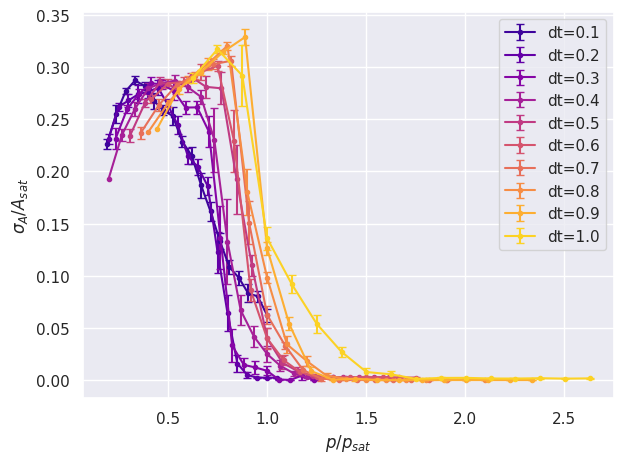

In [18]:
colors = sns.color_palette('plasma', len(df.timestep.unique()))
for dt, c in zip(df.timestep.unique(), colors):
    subdf = df[(df.timestep == dt)&(~df.is_asleep)].groupby('exc_conn_p')
    plt.errorbar(subdf.exc_conn_p.mean()/psat_dict[dt], subdf.rate_of_active_std.mean()/asat_dict[dt], 0.5*subdf.rate_of_active_std.std()/asat_dict[dt], 
                 color=c, marker='.', label=f"dt={dt:.1f}")
plt.legend()

plt.ylabel(r"$\sigma_{A}/A_{sat}$")
plt.xlabel(r"$p/p_{sat}$")

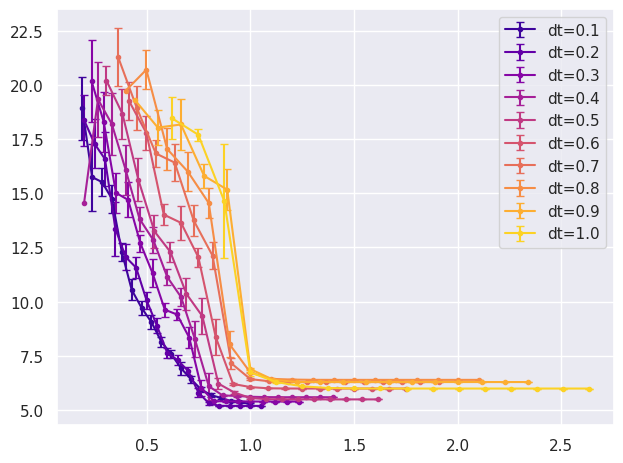

In [19]:
colors = sns.color_palette('plasma', len(df.timestep.unique()))
for dt, c in zip(df.timestep.unique(), colors):
    subdf = df[(df.timestep == dt)&(~df.is_asleep)].groupby('exc_conn_p')
    plt.errorbar(subdf.exc_conn_p.mean()/psat_dict[dt], subdf.isi_active_avg_mean.mean(), 0.5*subdf.isi_active_avg_mean.std(), 
                 color=c, marker='.', label=f"dt={dt:.1f}")
plt.legend()

Text(0, 0.5, '$\\sigma_{ISI}$')

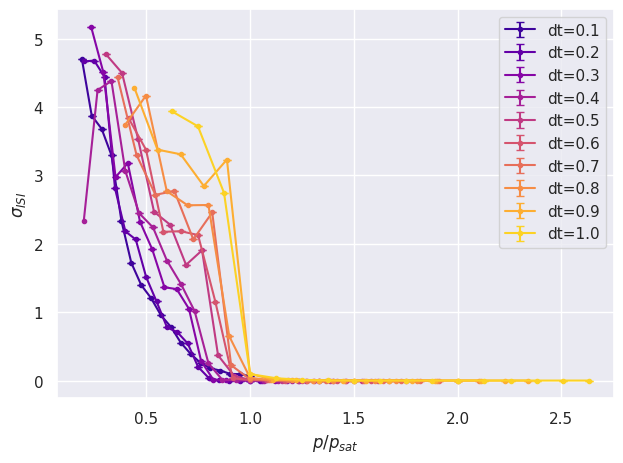

In [20]:
colors = sns.color_palette('plasma', len(df.timestep.unique()))
for dt, c in zip(df.timestep.unique(), colors):
    subdf = df[(df.timestep == dt)&(~df.is_asleep)].groupby('exc_conn_p')
    plt.errorbar(subdf.exc_conn_p.mean()/psat_dict[dt], subdf.isi_active_avg_tstd.mean()*asat_dict[dt]/1000, 0.*subdf.isi_active_avg_tstd.std(), 
                 color=c, marker='.', label=f"dt={dt:.1f}")
plt.legend()
plt.xlabel(r"$p/p_{sat}$")
plt.ylabel(r"$\sigma_{ISI}$")

### Test v-distrib

In [22]:
df.columns

Index(['pop_type', 'active_fraction', 'avg_activity', 'avg_isi_cv',
       'isi_active_avg_mean', 'isi_active_avg_tstd', 'phase_invariant_average',
       'rate_of_active_avg', 'rate_of_active_std', 'v_divergent',
       'v_regular_quants', 'timestep', 'exc_conn_p', 'is_asleep',
       'is_saturated'],
      dtype='object')

/tmp/ipykernel_6922/3406744537.py:19: RuntimeWarning: divide by zero encountered in divide
  p_x = np.diff(np.linspace(0,1,len(quants)))/np.diff(quants)
/tmp/ipykernel_6922/3406744537.py:20: RuntimeWarning: invalid value encountered in multiply
  p_x /= np.sum(p_x*np.diff(quants))


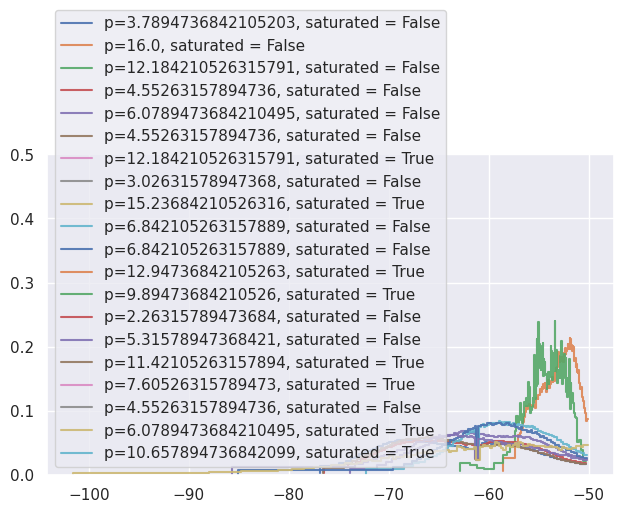

In [23]:
timesteps_to_plot = df.timestep.unique()# [0.1, 0.2, 0.3]
colors=sns.color_palette("plasma", len(timesteps_to_plot))

for dt,c in zip(timesteps_to_plot, colors):
    subdf = df[df.timestep == dt]
    
    for i in np.random.randint(len(subdf), size=2):
        samp = subdf.iloc[i]
        quants_string = str(samp.v_regular_quants)
        quants_string = quants_string.replace("[", '')
        quants_string = quants_string.replace("]", '')
        quants_string = quants_string.replace("\n", '')

        quants_substr = quants_string.split(" ")
        quants = [float(s) for s in quants_substr if s != '']
        quants = np.array(quants)

        try:
            p_x = np.diff(np.linspace(0,1,len(quants)))/np.diff(quants)
            p_x /= np.sum(p_x*np.diff(quants))
            x_x = 0.5*(quants[:-1] + quants[1:])
            plt.step(x_x, p_x,  alpha=0.9, label=f"p={samp.exc_conn_p}, saturated = {samp.is_saturated}")
        except Exception as e:
            print(e)
plt.ylim(0,0.5)
plt.legend()
plt.show()


/home/djanloo/spinnaker-venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


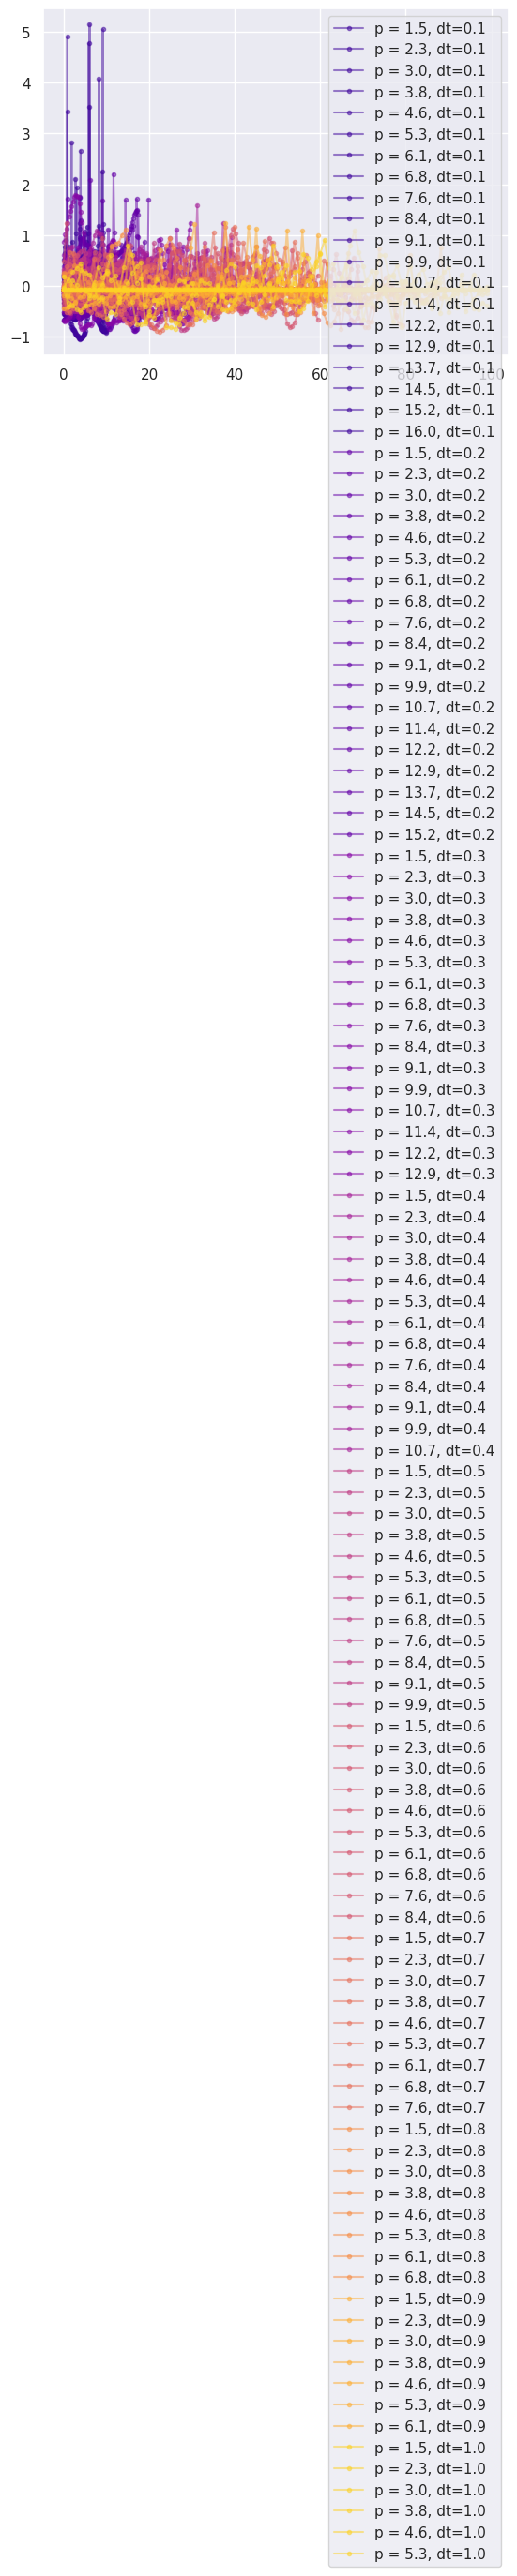

In [30]:
timesteps_to_plot = df.timestep.unique()
colors=sns.color_palette("plasma", len(timesteps_to_plot))

for dt,c in zip(timesteps_to_plot, colors):
    for p in np.sort(df.exc_conn_p.unique()):
        subdf = df[(df.exc_conn_p == p)&(df.timestep == dt)&(~df.is_saturated)]
        if len(subdf) > 0:
            for i in np.random.randint(len(subdf), size=1):
                pia = subdf.iloc[i].phase_invariant_average
                pia = pia.strip('[]')
                pia = pia.split(',')
                pia = np.array([float(pp) for pp in pia if pp != ''])
                plt.plot(np.arange(100)*dt, pia[:100], label=f"p = {subdf.iloc[i].exc_conn_p:.1f}, dt={dt:.1f}", color=c, marker=".", alpha=0.5)
plt.legend()
plt.show()

1000


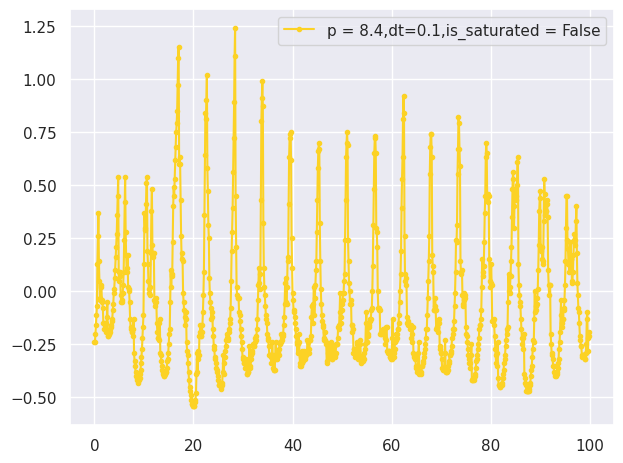

In [72]:
p_ref = (8, 9)
dt_ref = 0.1
mask = (df.exc_conn_p > p_ref[0])&(df.exc_conn_p < p_ref[1])&(df.timestep==dt_ref)
i=0
pia_record = df[mask].iloc[i]
pia = pia_record.phase_invariant_average.strip('[]')
pia = pia.split(',')
pia = np.array([float(pp) for pp in pia if pp != ''])
print(len(pia))
plt.plot(np.arange(len(pia))*dt_ref, pia, label=f"p = {pia_record.exc_conn_p:.1f},dt={pia_record.timestep:.1f},is_saturated = {pia_record.is_saturated}", color=c, marker=".")
plt.legend()

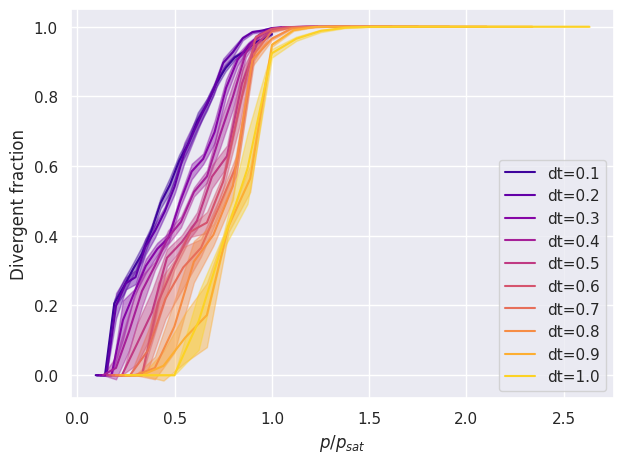

In [26]:
colors = sns.color_palette('plasma', len(df.timestep.unique()))
for dt, c in zip(df.timestep.unique(), colors):
    subdf = df[df.timestep == dt].groupby("exc_conn_p")
    plt.plot(subdf.exc_conn_p.mean()/psat_dict[dt], subdf.v_divergent.mean(), label=f"dt={dt}", ls="-", marker="",color=c)
    plt.fill_between(subdf.exc_conn_p.mean()/psat_dict[dt], 
                      subdf.v_divergent.mean() - 0.5*subdf.v_divergent.std(), 
                      subdf.v_divergent.mean() + 0.5*subdf.v_divergent.std(), color=c, alpha=0.4)
plt.ylabel("Divergent fraction")
plt.xlabel(r"$p/p_{sat}$")
plt.legend()

## Test UMAP

In [27]:
from umap import UMAP
reducer = UMAP(n_neighbors=30, min_dist=1.0)

In [28]:
df.columns

Index(['pop_type', 'active_fraction', 'avg_activity', 'avg_isi_cv',
       'isi_active_avg_mean', 'isi_active_avg_tstd', 'phase_invariant_average',
       'rate_of_active_avg', 'rate_of_active_std', 'v_divergent',
       'v_regular_quants', 'timestep', 'exc_conn_p', 'is_asleep',
       'is_saturated'],
      dtype='object')

In [57]:
from sklearn.preprocessing import MinMaxScaler
subdf = df.dropna()
subdf= subdf[~subdf.is_asleep.astype(bool)]
subdf = subdf[list(raw_df.func.unique()) + ['timestep', 'exc_conn_p']]
subdf = subdf.drop(columns=['v_regular_quants', 'phase_invariant_average'])
X = subdf.drop(columns=['timestep', 'exc_conn_p']).values
print(X.shape)
X = MinMaxScaler().fit_transform(X)
X

(1130, 8)


array([[8.00038599e-01, 8.55212355e-01, 8.70852788e-01, ...,
        7.83246003e-01, 8.11163824e-02, 9.47540297e-02],
       [7.86568989e-01, 8.35907336e-01, 8.70486478e-01, ...,
        7.68051745e-01, 6.75938883e-02, 7.57631909e-02],
       [6.94581598e-01, 7.66409266e-01, 8.08312932e-01, ...,
        6.75880031e-01, 1.19536770e-01, 1.35534040e-01],
       ...,
       [1.43131705e-01, 2.95366795e-01, 2.63360371e-01, ...,
        1.67195471e-01, 5.24423087e-01, 6.04984237e-01],
       [8.28899754e-01, 1.00000000e+00, 7.83298155e-01, ...,
        9.93773438e-01, 6.88661548e-04, 4.60966483e-02],
       [7.20547791e-01, 9.90347490e-01, 6.58075024e-01, ...,
        8.65177428e-01, 2.22979488e-02, 1.00073424e-01]])

In [58]:
embedding = reducer.fit_transform(X)

/home/djanloo/spinnaker-venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


/tmp/ipykernel_6922/3403610284.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = ['k'] + list(cm.get_cmap('plasma', n_bands).colors) + ['g']


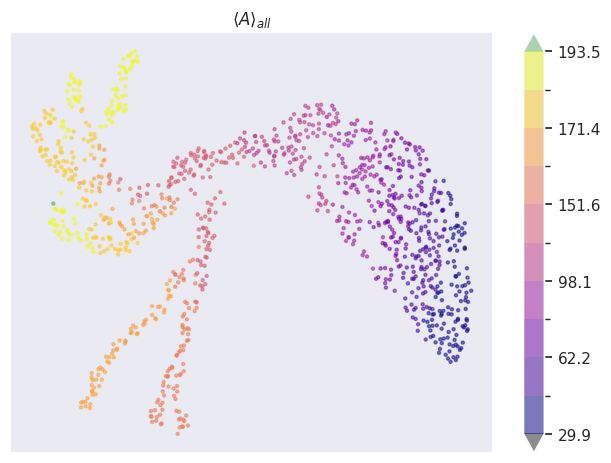

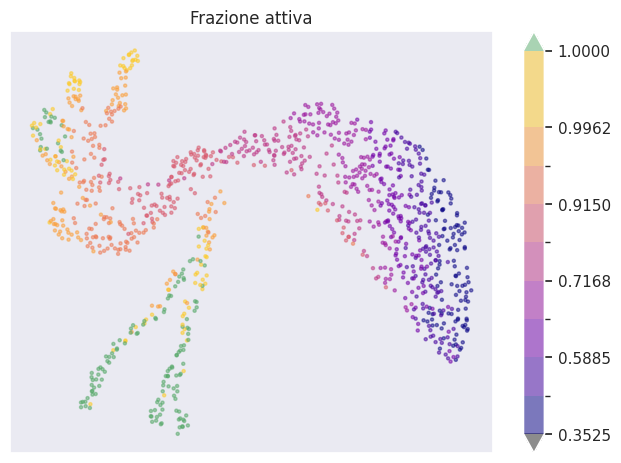

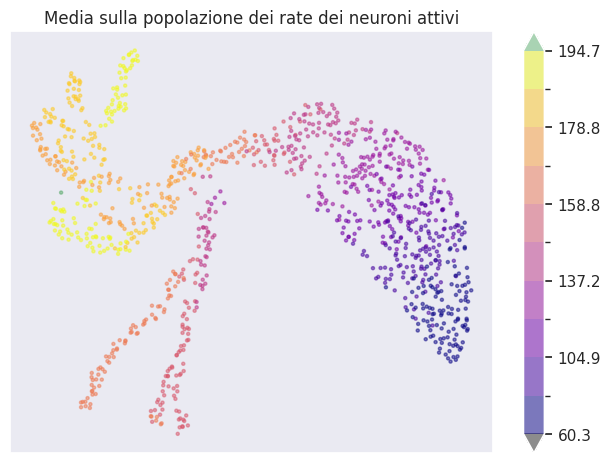

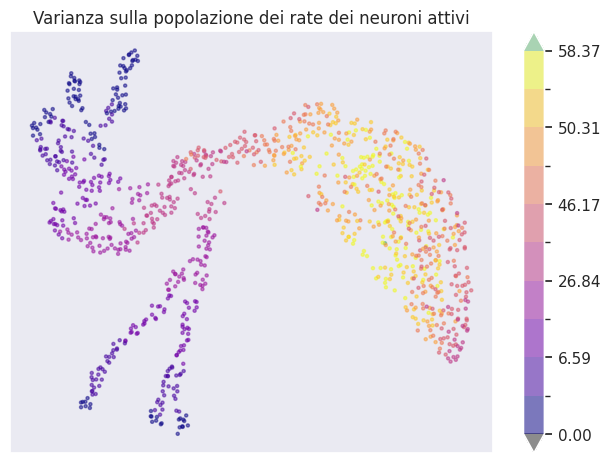

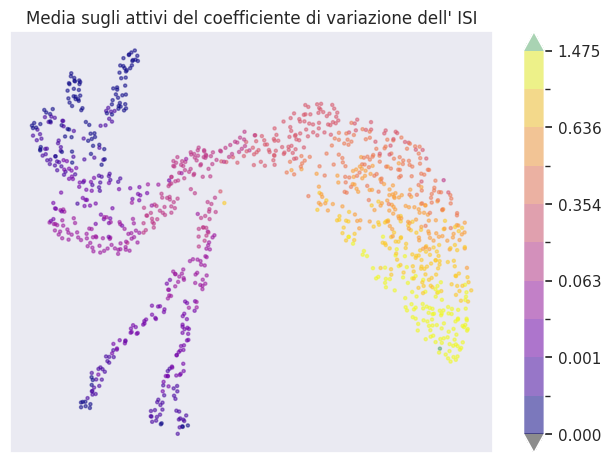

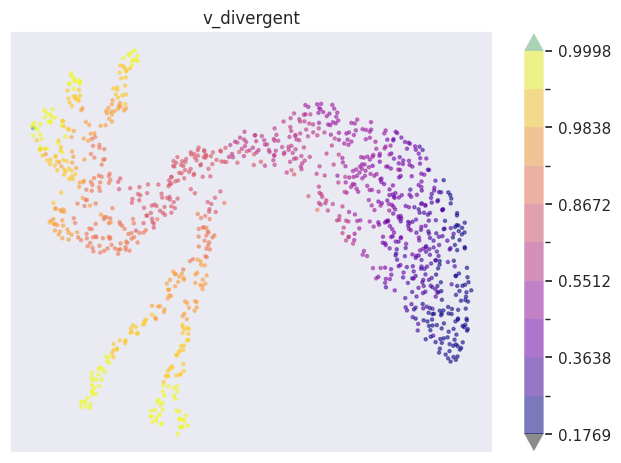

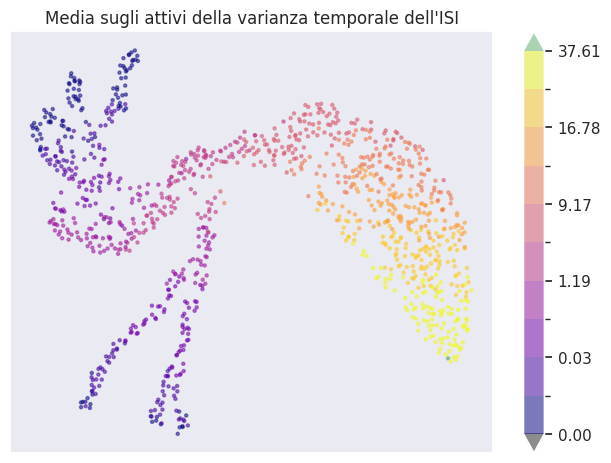

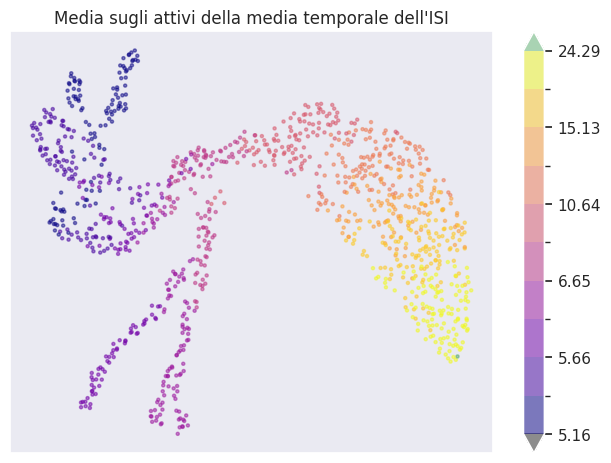

In [61]:
import matplotlib.colors as mcolors
from matplotlib import cm

n_bands = 10
colors = ['k'] + list(cm.get_cmap('plasma', n_bands).colors) + ['g']

funcdesc = dict(avg_activity=r"$\langle A \rangle_{all}$",
                active_fraction=f"Frazione attiva",
                rate_of_active_avg="Media sulla popolazione dei rate dei neuroni attivi",
                rate_of_active_std="Varianza sulla popolazione dei rate dei neuroni attivi",
                avg_isi_cv="Media sugli attivi del coefficiente di variazione dell' ISI",
                isi_active_avg_mean="Media sugli attivi della media temporale dell'ISI",
                isi_active_avg_tstd="Media sugli attivi della varianza temporale dell'ISI")


for func in raw_df.func.unique():
    if func == 'v_regular_quants' or func == 'phase_invariant_average':
        continue
    plt.figure()
    title = funcdesc.get(func, func)
    plt.title(title)
    levels = np.quantile(subdf[func].values, np.linspace(0,1,n_bands + 1))
    cmap, norm = mcolors.from_levels_and_colors(levels, colors, extend="both")
    plt.scatter(*(embedding.T), c=subdf[func], s=5,alpha=0.5, cmap=cmap, norm=norm)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()
    # plt.figure()
    # plt.hist(subdf[func])
    # plt.title(func)

/tmp/ipykernel_6922/1580852675.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap("tab10", 10)
/tmp/ipykernel_6922/1580852675.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = cm.get_cmap("rainbow", 10)


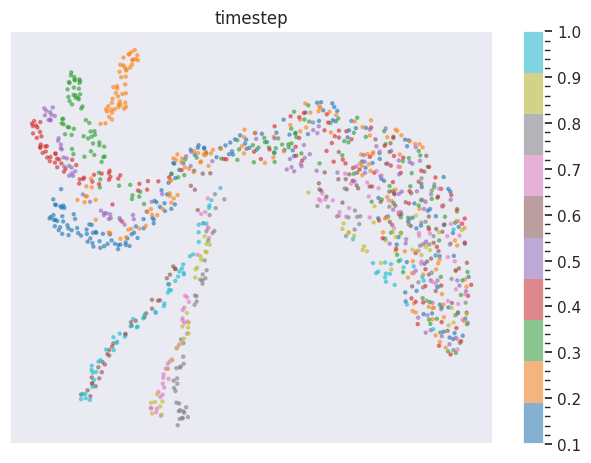

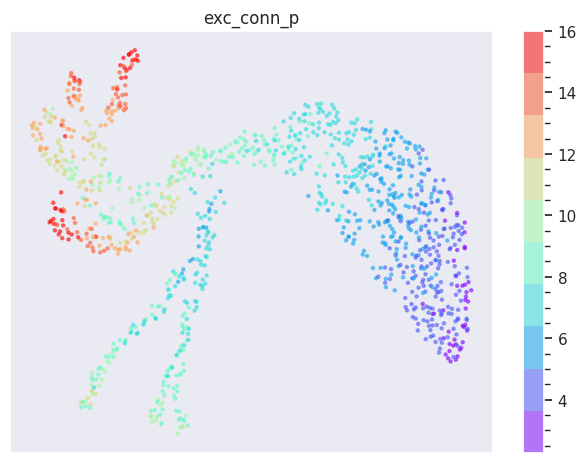

In [62]:
from matplotlib import cm
cmap1 = cm.get_cmap("tab10", 10)
cmap2 = cm.get_cmap("rainbow", 10)
for func,cmap in zip(['timestep', 'exc_conn_p'], [cmap1,cmap2]):
    plt.figure()
    plt.title(func)
    plt.scatter(*(embedding.T), c=subdf[func], s=5,alpha=0.5, cmap=cmap)
    plt.xticks([])
    plt.yticks([])
    plt.colorbar()

0
0
(0, 8) (0, 8)
avg_activity


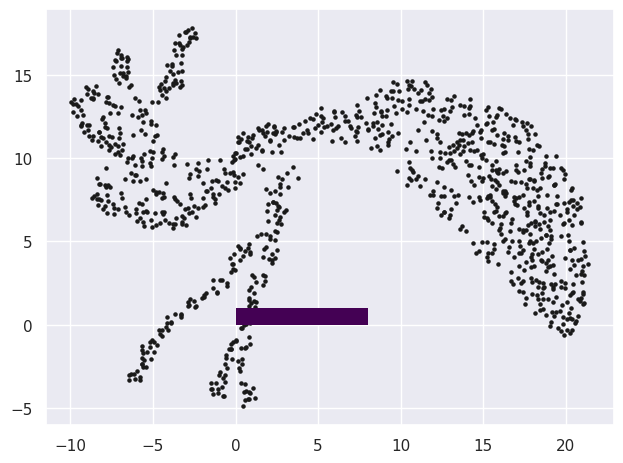

In [63]:
plt.scatter(*(embedding.T), s=5, c='k')

mask1 = (subdf.timestep== 1.0)&(subdf.exc_conn_p >= 14)
print(np.sum(mask1))
mask2 = (subdf.timestep == 0.6)&(subdf.exc_conn_p >= 14)
print(np.sum(mask2))

for mask in [mask1, mask2]:
    plt.scatter(*(embedding[mask].T), s=5, c='r')




group1 = X[mask1]
group2 = X[mask2]
dist = np.zeros(group1.shape[1])

print(group1.shape, group2.shape)

for x1 in group1:
    for x2 in group2:
        dist += np.abs(x1 - x2)
plt.pcolormesh([dist], cmap="viridis")
print(list(raw_df.func.unique())[np.argmax(dist)])

/tmp/ipykernel_6922/4050298953.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = ['k'] + list(cm.get_cmap('plasma', n_bands).colors) + ['g']


19 10


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

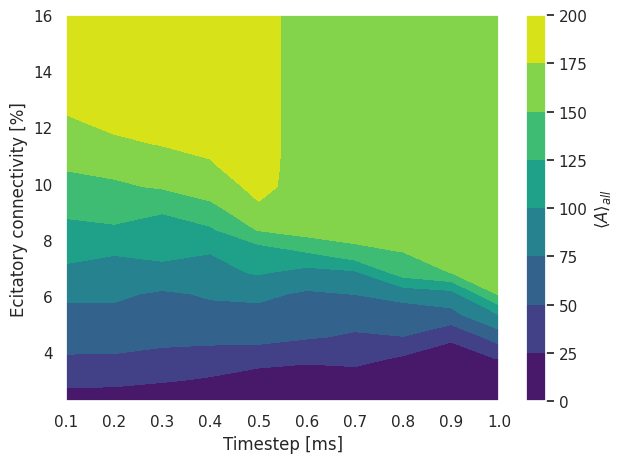

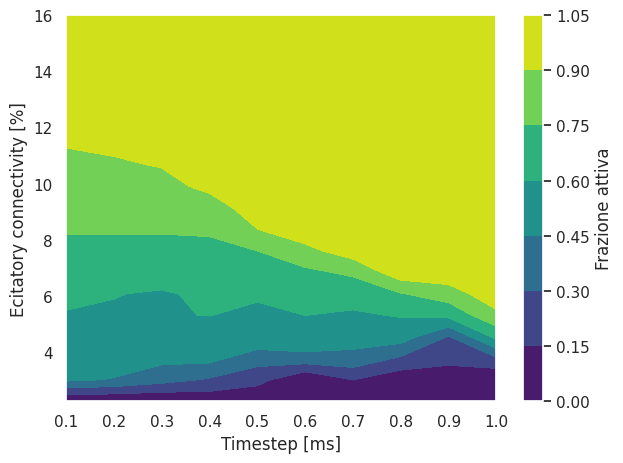

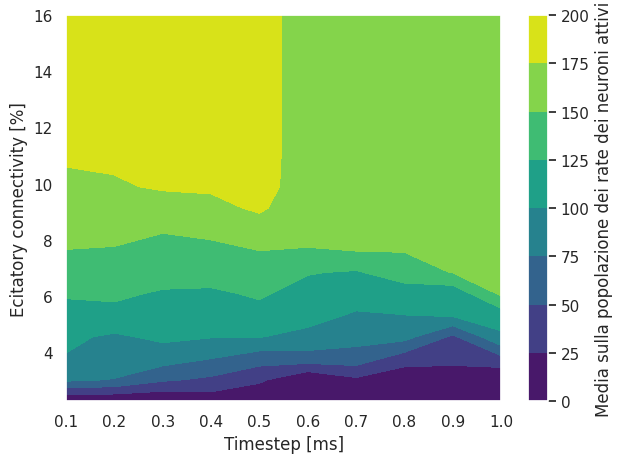

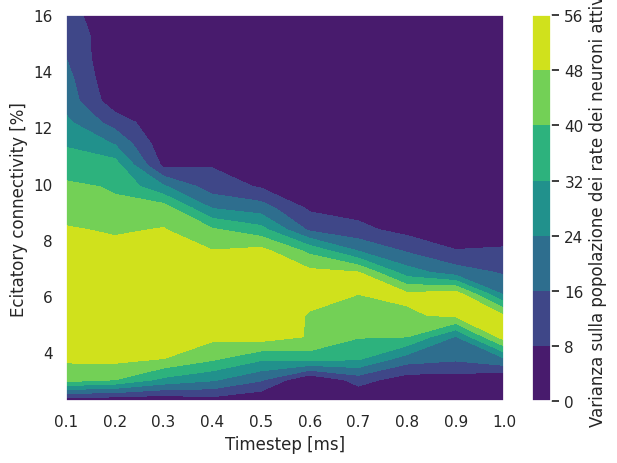

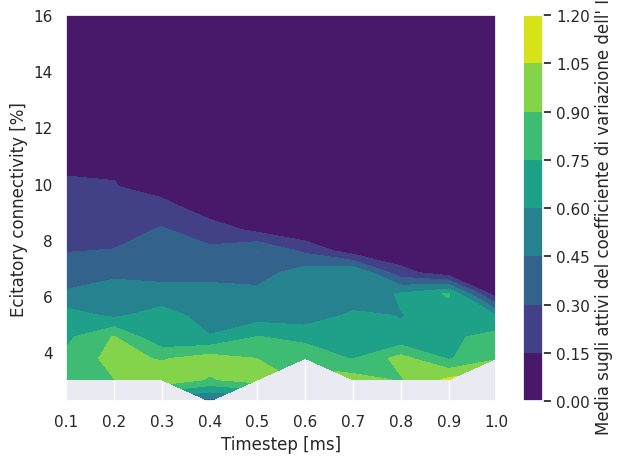

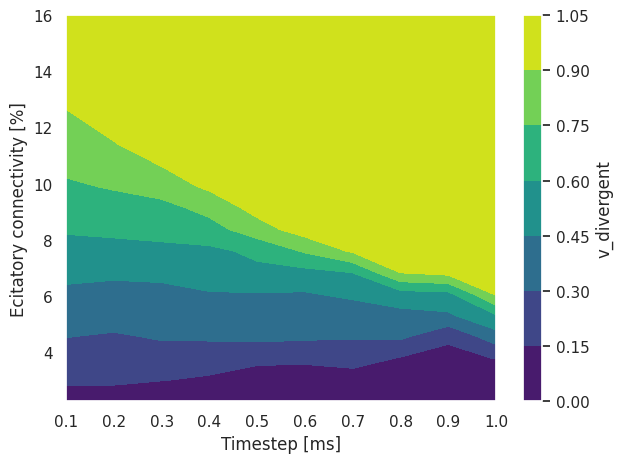

<Figure size 640x480 with 0 Axes>

In [64]:
n_bands = 10
colors = ['k'] + list(cm.get_cmap('plasma', n_bands).colors) + ['g']


t, p = np.sort(subdf.timestep.unique()), np.sort(subdf.exc_conn_p.unique())
T, P = np.meshgrid(t, p)
Z = np.zeros((len(t), len(p)))

print(len(p), len(t))

for func in raw_df.func.unique():
    if func == 'v_regular_quants':
        continue
    plt.figure()
    for i in range(len(t)):
        for j in range(len(p)):

            mask = (df.timestep==t[i])&(df.exc_conn_p==p[j])
            if np.sum(mask) == 0:
                print(f"No values found for {func} in p={p[j]}, t={t[i]}")
            values = df.loc[mask][func]
            values = values[~np.isnan(values)]
            Z[i,j] = np.mean(values)


    plt.contourf(T,P,Z.T, cmap='viridis')

    plt.xlabel("Timestep [ms]")
    plt.ylabel("Ecitatory connectivity [%]")

    plt.colorbar(label=funcdesc.get(func, func))

In [ ]:
subdf[['timestep', 'exc_conn_p', 'avg_activity']]

timestep  exc_conn_p  avg_activity
id                                                            
342595-139947059666560_exc       0.1   14.473684    186.177632
342595-139947059779664_exc       0.1    5.315789     61.650000
342595-139947125983120_exc       0.1    6.842105     87.047368
342595-139947179150496_exc       0.1   10.657895    146.239474
342595-139949134243104_exc       0.1   15.236842    191.894737
...                              ...         ...           ...
342604-139949214259856_exc       1.0   13.710526    166.315789
342604-139949214329248_exc       1.0    3.026316     36.852632
342604-139949214341872_exc       1.0   15.236842    166.456579
342604-139949214371264_exc       1.0    4.552632     60.259211
342604-139949703518288_exc       1.0   16.000000    166.398684

[1721 rows x 3 columns]

In [ ]:
N_quants = 100
x1 = np.random.normal(1,1, size=100000)
x2 = np.random.normal(5, 1, size=2)
x = np.concatenate((x1, x2))

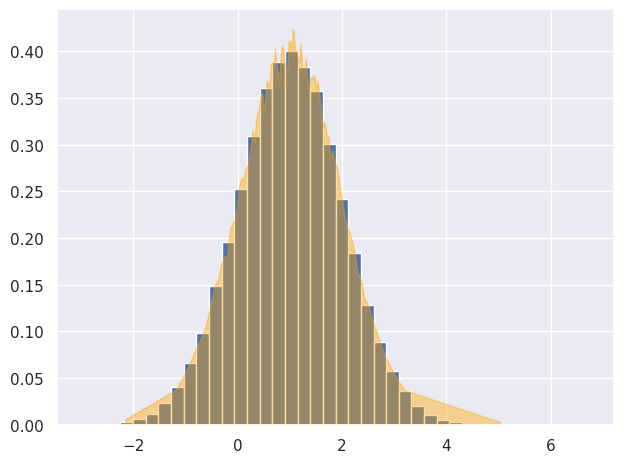

In [ ]:
quants = np.quantile(x, np.linspace(0,1, N_quants))

# plt.plot(quants, np.linspace(0,1, N_quants), ls='', marker=".")

p_x = np.diff(np.linspace(0,1,N_quants))/np.diff(quants)
p_x /= np.sum(p_x*np.diff(quants))

x_x = 0.5*(quants[:-1] + quants[1:])


plt.hist(x, density=True, bins=40)
plt.fill_between(x_x, p_x, color="orange", alpha=0.4)


In [ ]:
from scipy.integrate import simpson

simpson(p_x*x_x**2, x_x, np.diff(x_x))
for n in range(6):
    est_sam= np.mean(x**n)
    est_quant = np.sum(p_x*x_x**n*np.diff(quants))
    est_trapz = np.trapz(p_x*x_x**n, x_x)
    est_simps = simpson(p_x*x_x**n, x_x)
    print(f"momentum {n}: sample -> {est_sam:.2f}\tquant -> {est_quant:.2f}\ttrapz -> {est_trapz}\tsimpson -> {est_simps:.2f}")


momentum 0: sample -> 1.00	quant -> 1.00	trapz -> 1.030143448621456	simpson -> 0.98
momentum 1: sample -> 1.00	quant -> 1.01	trapz -> 1.0662268025594899	simpson -> 0.98
momentum 2: sample -> 1.99	quant -> 2.13	trapz -> 2.2335047253965232	simpson -> 2.03
momentum 3: sample -> 3.99	quant -> 4.71	trapz -> 4.784156975069359	simpson -> 4.34
momentum 4: sample -> 9.98	quant -> 14.62	trapz -> 12.829601949698345	simpson -> 12.00
momentum 5: sample -> 26.17	quant -> 50.79	trapz -> 37.13544511856154	simpson -> 35.78


In [ ]:
from scipy.fft import fft, ifft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

def f(t, phase):
    yy = np.cos(2*np.pi*0.5*(t-phase))
    zz =  2*np.sin(2*np.pi*2.0*(t-phase))
    result = yy.copy()
    result[yy>=0] = yy[yy>=0]
    result[zz>= 0] = yy[zz>=0] + zz[zz>=0] + 1
    return result - np.mean(result)

tt = np.linspace(0, 5, 1000, endpoint=False)
signals = np.zeros((100, 1000))
true_phases = np.zeros(len(signals))

for i in range(len(signals)):
    true_phases[i] = np.random.normal(0, 1)
    signals[i] = f(tt, true_phases[i]) + np.random.normal(0,0.2, size=signals.shape[1])

In [ ]:
def get_timeshift(signal, reference_signal, dt, npts=10):
    fourier = fft(signal)
    fourier_reference = fft(reference_signal)
    freqs = fftfreq(len(signal), dt)

    best_freqs = np.argsort(np.abs(fourier)*np.abs(fourier_reference))[-npts:]

    return np.mean((np.angle(fourier[best_freqs]) - np.angle(fourier_reference[best_freqs]))/freqs[best_freqs])

def get_timeshift_by_best_match(signal, reference_signal, tol=0.1):
    scaler = StandardScaler()
    signal = scaler.fit_transform(signal.reshape(-1,1)).reshape(-1)
    reference_signal = scaler.fit_transform(reference_signal.reshape(-1,1)).reshape(-1)
    dists = np.zeros(len(reference_signal))
    for i in range(1, len(signal)):
        rounded_signal = signal.copy()
        # print(signal[-i:].shape)
        # print(signal[:-i].shape)
        rounded_signal[:i] = signal[-i:]
        rounded_signal[i:] = signal[:-i]
        dists[i] = np.sum((rounded_signal - reference_signal)**2)
        if i > 1 and dists[i] < dists[i-1] and dists[i] < tol*len(signal):
            print(f'stopped at iter {i} over {len(signal)}')
            break
    
    best_match = np.argmin(dists[1:]) + 1
    best_match_signal = signal.copy()
    best_match_signal[:best_match] = signal[-best_match:]
    best_match_signal[best_match:] = signal[:-best_match]

    return best_match_signal



def shift_back(signal, dt, delta_t):
    fourier = fft(signal)
    freqs = fftfreq(len(signal), dt)
    fourier *= np.exp(-1j*freqs*delta_t)
    return np.real(ifft(fourier))


stopped at iter 61 over 1000
stopped at iter 202 over 1000
stopped at iter 76 over 1000
stopped at iter 147 over 1000
stopped at iter 54 over 1000
stopped at iter 122 over 1000
stopped at iter 271 over 1000
stopped at iter 64 over 1000
stopped at iter 194 over 1000
stopped at iter 81 over 1000
stopped at iter 64 over 1000
stopped at iter 186 over 1000
stopped at iter 78 over 1000
stopped at iter 123 over 1000
stopped at iter 178 over 1000
stopped at iter 66 over 1000
stopped at iter 114 over 1000
stopped at iter 311 over 1000
stopped at iter 334 over 1000
stopped at iter 68 over 1000
stopped at iter 100 over 1000
stopped at iter 158 over 1000
stopped at iter 76 over 1000
stopped at iter 49 over 1000
stopped at iter 279 over 1000
stopped at iter 149 over 1000
stopped at iter 67 over 1000
stopped at iter 295 over 1000
stopped at iter 177 over 1000
stopped at iter 298 over 1000
stopped at iter 137 over 1000
stopped at iter 281 over 1000
stopped at iter 340 over 1000
stopped at iter 67 ove

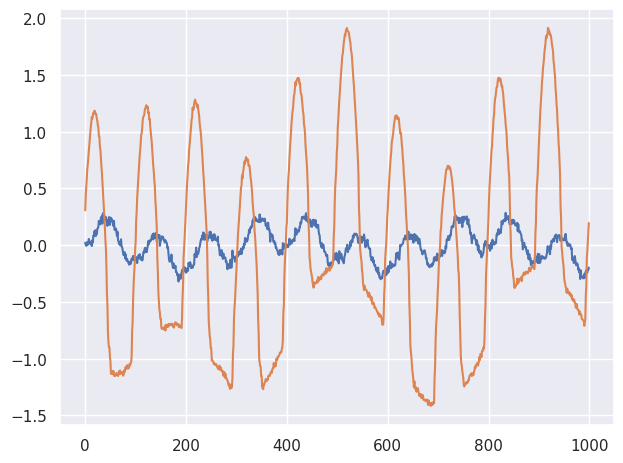

In [ ]:
new_signals = signals.copy()

for i in range(1,len(new_signals)):
    new_signals[i] = get_timeshift_by_best_match(signals[i], signals[0], tol=0.5)

plt.plot(np.mean(signals, axis=0))
plt.plot(np.mean(new_signals, axis=0))

(500,)


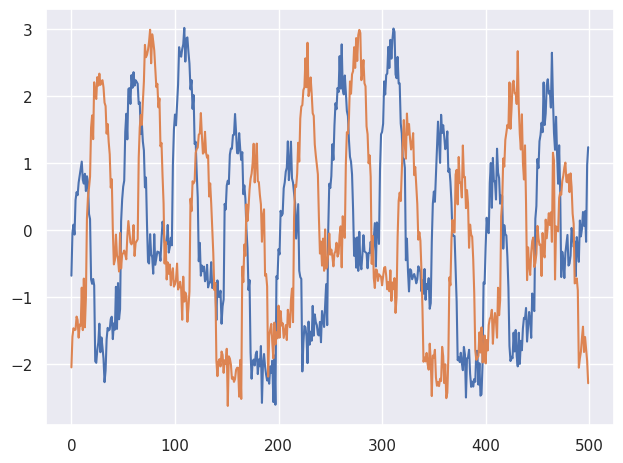

In [ ]:
from scipy.signal import convolve
from sklearn.preprocessing import StandardScaler
def dist_by_conv(signal, reference):
    scaler = StandardScaler()
    signal = scaler.fit_transform(signal.reshape(-1,1)).reshape(-1)
    reference = scaler.fit_transform(reference.reshape(-1,1)).reshape(-1)
    dist = convolve(signal, reference, mode='same')
    print(dist.shape)
    return np.argmax(dist)
    

plt.plot(signals[0])
d = dist_by_conv(signals[0], signals[1])
dt = np.diff(tt)[0]
plt.plot(shift_back(signals[0], dt , -d*dt))

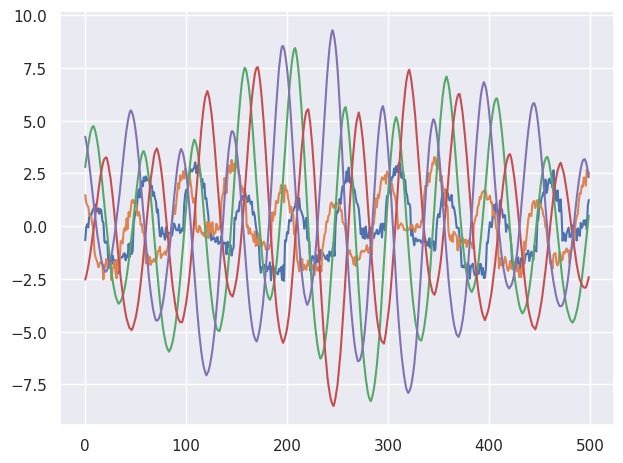

In [ ]:
y = signals[0]
z = signals[1]
plt.plot(y)
plt.plot(z)
plt.plot(np.convolve(y,z, mode='same')/100)
plt.plot(np.convolve(y,y, mode='same')/100)
plt.plot(np.convolve(z,z, mode='same')/100)